In [39]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split 
import numpy as np

# Supervised learning
El dataset contiene informnación acerca de los artículos publicados en un sitio web (*Mashable*). Interesa saber cuánto ingreso podemos esperar por cada artículo.

Dado que el dataset no contiene informnación acerca de los ingresos, se supondrá que los ingresos están relacionado con las visitas a los articulos, y que las visitas están relacionadas con la cantidad de veces que el artículo se comparte.

In [5]:
news = pd.read_csv('d:\\cursos\\data_science\\data\\OnlineNewsPopularity.csv')

In [6]:
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


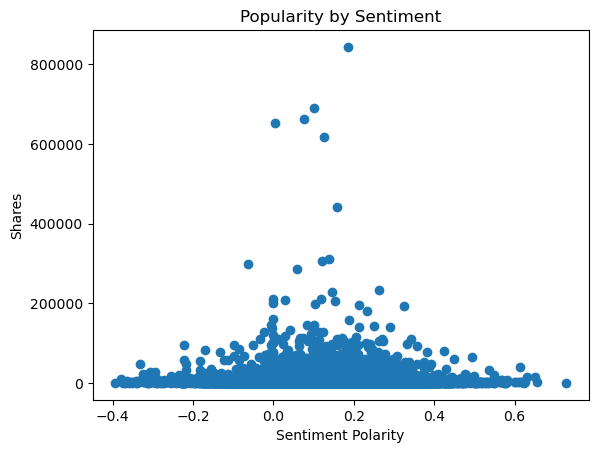

In [7]:
plt.scatter(news[' global_sentiment_polarity'],news[' shares'])
plt.title('Popularity by Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Shares')
plt.show()

## Regresión lineal

In [8]:
x = news[' global_sentiment_polarity'].values.reshape(-1,1)
y = news[' shares'].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(x,y)
print(regressor.intercept_)
print(regressor.coef_)

[3335.80329021]
[[499.34840588]]


La ecuación resultante es:

$$shares = 3335.8 + 499.3\cdot sentiment$$

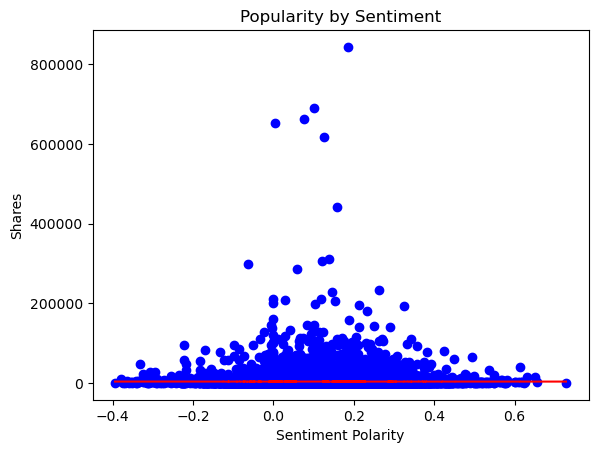

In [9]:
regline = regressor.predict(x)
plt.scatter(news[' global_sentiment_polarity'],news[' shares'], color = 'blue')
plt.plot(sorted(news[' global_sentiment_polarity'].tolist()), regline,'r')
plt.title('Popularity by Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Shares')
plt.show()

El modelo de regresión lineal concibe el mundo de manera lineal, y no siempre es la manera más precisa con la que enfocarse en un problema.

## K-Nearest Neighbors
1. Escoger un punto $p$ para analizar.
2. Escoger un valor para $k$.
3. Buscar los $k$ puntos más cercanos a $p$.
4. La media de los $k$ valores es la predicción de $p$.

Fijemos un ejemplo con $k=15$ y $p=0.5$, donde $p$ es la medida de la polaridad de los artículos.

In [10]:
k=15
newsentiment = 0.5

In [11]:
allsentiment = news[' global_sentiment_polarity'].tolist() # Listar datos de polaridad
allshares = news[' shares'].tolist()                           # Listar datos de shares
distances = [abs(x-newsentiment) for x in allsentiment]    # Comparar distancias
idx = np.argsort(distances)                                    # Ordenar indices
idx[0:k]

array([30230, 22546,  7284, 13035, 29598, 19361, 36029, 30670, 25556,
        6744, 26473,  7211,  9200, 15198, 31496], dtype=int64)

In [12]:
nearbyshares = [allshares[x] for x in idx[0:k]]
np.mean(nearbyshares)

7344.466666666666

La predicción para una polaridad de $p=0.5$ es $shares = 7344$.

## K-NN con sklearn

In [13]:
x=np.array(allsentiment).reshape(-1,1)     # Acomodar valores
y=np.array(allshares)                      # Acomodar valores
knn = KNeighborsRegressor(n_neighbors=k)   # Crear modelo
knn.fit(x,y)                               # Ajustar modelo

KNeighborsRegressor(n_neighbors=15)

In [14]:
knn.predict(np.array([newsentiment]).reshape(-1,1))

array([7344.46666667])

## Otros algoritmos de aprendizaje supervisado
La estructura seguida hasta ahora puede describirse como sigue:
    Importar el paquete.
    Definir un regressor.
    Ajustar el modelo.
    Usar el modelo para predecir.
A continuación se muestran algunos ejemplos de otros algoritmos de aprendizaje supervisado.

### Decision Trees


In [15]:
dtregressor = DecisionTreeRegressor(max_depth=3)
dtregressor.fit(np.array(allsentiment).reshape(-1,1), np.array(allshares))
dtregressor.predict(np.array([newsentiment]).reshape(1,-1))

array([3978.70776621])

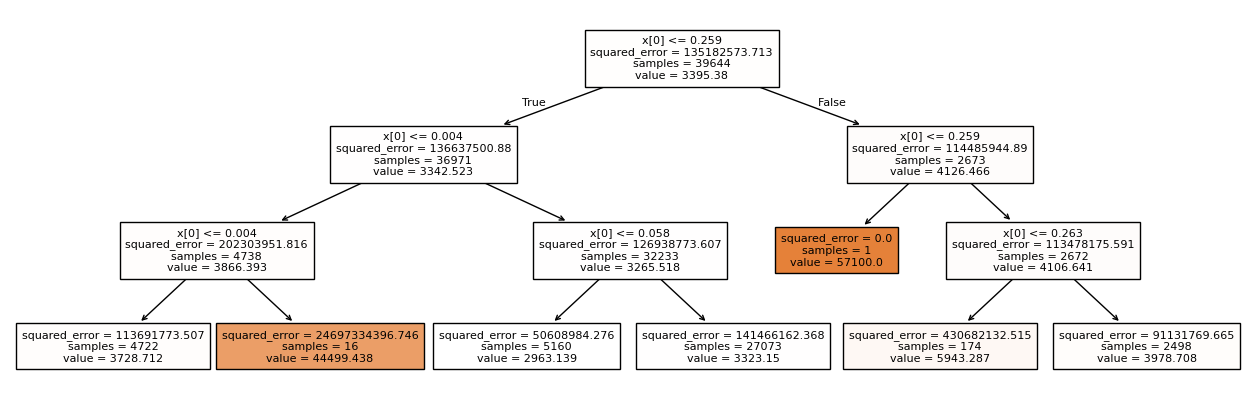

In [16]:
plt.figure(figsize=(16,5))
plot_tree(dtregressor, filled=True, fontsize=8)
plt.savefig('decisiontree.png')

## Midiendo la precisión

Una posible manera de predecir el error:
```python
allprediction = regressor.predict(np.array([allsentiment]).reshape(-1,1))
predictionerror = (allprediction-y)
np.mean(predictionerror)
```
Esto conduce a un error de *postdicción*: hemos dicho lo que sucede, después de que ya sucedió. No hemos predicho nada.

In [34]:
x=np.array([allsentiment]).reshape(-1,1)
y=np.array(allshares)
trainingx, testx, trainingy, testy = train_test_split(x,y,random_state=1)

In [41]:
rfregressor = RandomForestRegressor(random_state=1) 
rfregressor.fit(trainingx, trainingy)
predicted = rfregressor.predict(testx)
predictionerror = abs(predicted-testy)

In [42]:
np.mean(predictionerror)

3816.4741523079983

In [43]:
knnregressor = KNeighborsRegressor(n_neighbors=15) 
knnregressor.fit(trainingx, trainingy) 
predicted = knnregressor.predict(testx) 
predictionerror = abs(predicted-testy)

In [44]:
np.mean(predictionerror)

3305.1753876164535

## Modelos multivariados

In [47]:
x=news[[' global_sentiment_polarity', ' n_unique_tokens', ' n_non_stop_words']]
y=np.array(allshares)
trainingx, testx, trainingy, testy = train_test_split(x,y,random_state=1)
rfregressor = RandomForestRegressor(random_state=1) 
rfregressor.fit(trainingx, trainingy)
predicted = rfregressor.predict(testx)
predictionerror = abs(predicted-testy)

Vemos que la medida de errar ha disminuido. El modelo multivariado se desempeña mejor que nuestro modelo univariado.

In [48]:
np.mean(predictionerror)

3474.431322312199

## Clasificación en lugar de regresión

In [50]:
themedian = np.median(news[' shares'])
news['abovemedianshares'] = 1*(news[' shares'] > themedian)

In [51]:
x=news[[' global_sentiment_polarity',' n_unique_tokens',' n_non_stop_words']] 
y=np.array(news['abovemedianshares'])
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors=15)
trainingx, testx, trainingy, testy = train_test_split(x,y,random_state=1)
knnclassifier.fit(trainingx,trainingy)
predicted = knnclassifier.predict(testx)

In [52]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(testy, predicted)

array([[2833, 2150],
       [2539, 2389]], dtype=int64)

In [53]:
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
precision = precision_score(testy,predicted) 
recall = recall_score(testy,predicted)

In [54]:
print(f'Precision = {precision}')
print(f'Recall = {recall}')

Precision = 0.5263273848865389
Recall = 0.48478084415584416
